# Spectral form factor

Ref for equations: PHYSICAL REVIEW X 12, 011018 (2022)

SFF is the Fourier transform of the two point energy desnity
$$ K(t) \equiv \frac{1}{D^2} \overline{\sum_{i, j} e^{i\left(E_i-E_j\right) t}}=\frac{1}{D^2} \overline{\operatorname{Tr}[T(t)] \operatorname{Tr}\left[T^{\dagger}(t)\right]}
$$

D is the Hilbert space dimension. $\{E_i\}$ is the energy eigenstate.

In [1]:
#import usual libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import sparse
from numpy import linalg as LA
from scipy import linalg as sLA
from scipy.sparse.linalg import eigs
from IPython.display import display, Latex
from decimal import *
import pandas as pd
import math
from qiskit.visualization import plot_histogram
from qiskit.visualization import *
from qiskit.circuit.library import iSwapGate
from scipy.linalg import expm,eig
from scipy.stats import unitary_group
from IPython.core.interactiveshell import InteractiveShell
from utils_operators import *
from utils_observables import *
#from bristol.ensembles import Circular
from itertools import cycle
from functools import reduce
import sys
from scipy.io import mmread
from qiskit.visualization import array_to_latex

mycolor=cycle('krcbm')
mymarker=cycle('oxs^v')

InteractiveShell.ast_node_interactivity = "all"
getcontext().prec = 30


# Main Body of the code

In [2]:
N=6


delt=0.3
nstep=500

nq=N//2
mmax=2**nq
Jsqr=1

totalT=delt*nstep
mytimes1=np.arange(0,totalT+delt/2,delt)

# Read SYK Hamiltonian from file

In [3]:
Harr=[]
idstart=2
idend=11
totalid=idend-idstart+1
for instance_id in range(idstart,idend+1):
    syk_op = mmread("N%d_configs/H_N%d_%d.mtx" %(N,N,instance_id))
    Harr.append(syk_op)

In [4]:
len(Harr)

10

# SFF Definition 1


/home/asad/anaconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


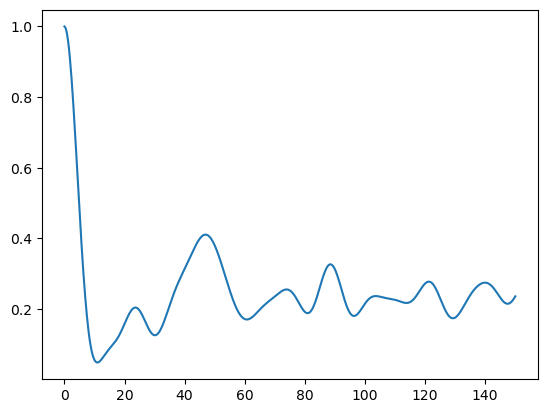

In [5]:

exact_nstep=int(1*nstep)   # extraFactor*nstep #2000
exact_delt=totalT/exact_nstep  #1000/2000=0.5  #0.5*2000=1000


SFF=np.zeros(exact_nstep+1)+0.0j

for i in range(totalid):
    Eval,Evec=compute_eigens(Harr[i])
    for ind in range(exact_nstep+1):
        tt=ind*exact_delt
        #print(tt)
        SFF[ind]=SFF[ind]+np.real(compute_sff_instance(Eval,tt))
    
    

SFF=SFF/totalid

plt.plot(mytimes1,SFF)
    


# SFF definition 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$ O(t) $')

Text(0.5, 0, '$t$')

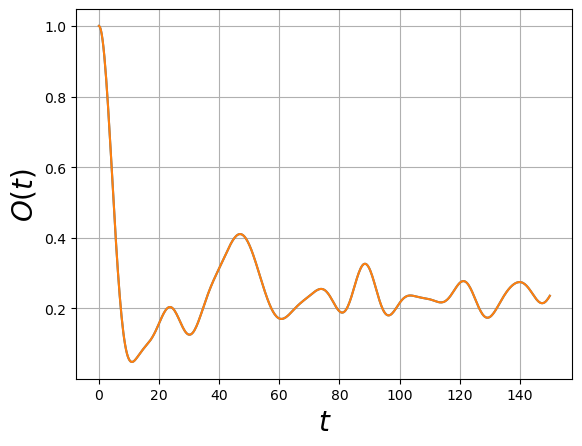

In [6]:
exact_nstep=int(1*nstep)   # extraFactor*nstep #2000
exact_delt=totalT/exact_nstep  #1000/2000=0.5  #0.5*2000=1000


SFF2=np.zeros(exact_nstep+1)+0.0j

for i in range(totalid):
    for ind in range(exact_nstep+1):
        tt=ind*exact_delt
        #print(tt)
        SFF2[ind]=SFF2[ind]+np.real(compute_sff_instance2(Harr[i],tt))
    
    

SFF2=SFF2/totalid

plt.plot(mytimes1,SFF)
plt.plot(mytimes1,SFF2)
plt.legend(loc='best',frameon=False,fontsize=20)
plt.ylabel(r'$ O(t) $',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.grid()
plt.savefig(r'spectral_form_factor.png',bbox_inches='tight')
plt.show()
plt.close()
    
    
